In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm

In [4]:
#load data
mydata = pd.read_csv('merged_data.csv')

In [5]:
#look at data
mydata


,Unnamed: 0,Year,Month,ISHMT,discharge_rate,date,County,PM2.5,PM10
0,0,2020,6,Acute upper respiratory infections & influenza...,0.020226,2020-06-01,Cork,2.449595,4.925600
1,1,2020,7,Acute upper respiratory infections & influenza...,0.023597,2020-07-01,Cork,2.918698,8.976464
2,2,2020,8,Acute upper respiratory infections & influenza...,0.038767,2020-08-01,Cork,5.503203,11.047632
3,3,2020,9,Acute upper respiratory infections & influenza...,0.062364,2020-09-01,Cork,5.348747,11.373366
4,4,2020,10,Acute upper respiratory infections & influenza...,0.038767,2020-10-01,Cork,6.587163,12.050000
...,...,...,...,...,...,...,...,...,...
597,597,2023,8,Pneumonia (J12-J18),0.190482,2023-08-01,Dublin,4.065971,8.849873
598,598,2023,9,Pneumonia (J12-J18),0.179160,2023-09-01,Dublin,7.197300,13.106326
599,599,2023,10,Pneumonia (J12-J18),0.238436,2023-10-01,Dublin,6.902304,13.438059
600,600,2023,11,Pneumonia (J12-J18),0.265743,2023-11-01,Dublin,7.755754,13.776940


In [6]:
#drop first col not needed
mydata.drop(mydata.columns[0], axis=1, inplace=True)
mydata

,Year,Month,ISHMT,discharge_rate,date,County,PM2.5,PM10
0,2020,6,Acute upper respiratory infections & influenza...,0.020226,2020-06-01,Cork,2.449595,4.925600
1,2020,7,Acute upper respiratory infections & influenza...,0.023597,2020-07-01,Cork,2.918698,8.976464
2,2020,8,Acute upper respiratory infections & influenza...,0.038767,2020-08-01,Cork,5.503203,11.047632
3,2020,9,Acute upper respiratory infections & influenza...,0.062364,2020-09-01,Cork,5.348747,11.373366
4,2020,10,Acute upper respiratory infections & influenza...,0.038767,2020-10-01,Cork,6.587163,12.050000
...,...,...,...,...,...,...,...,...
597,2023,8,Pneumonia (J12-J18),0.190482,2023-08-01,Dublin,4.065971,8.849873
598,2023,9,Pneumonia (J12-J18),0.179160,2023-09-01,Dublin,7.197300,13.106326
599,2023,10,Pneumonia (J12-J18),0.238436,2023-10-01,Dublin,6.902304,13.438059
600,2023,11,Pneumonia (J12-J18),0.265743,2023-11-01,Dublin,7.755754,13.776940


## Random Forest
#### Build for mydata_pre_feb2022 (up to the end of the COVID restrictions)

In [7]:
#convert categorical variables
mydata_2022_encoded = pd.get_dummies(mydata, columns=['ISHMT', 'County'], drop_first=True)

#split data into covid and post-covid
mydata_pre_feb2022 = mydata_2022_encoded[mydata_2022_encoded['date']<'2022-02-01']
mydata_post_feb2022 = mydata_2022_encoded[mydata_2022_encoded['date']>='2022-02-01']

In [8]:
mydata_model = mydata_pre_feb2022
#get rid of date it is not needed
mydata_model = mydata_model.drop(columns=['date'])

#sort X (features) and y (target)
X = mydata_model.drop(columns=['discharge_rate'])
y = mydata_model['discharge_rate']

#split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Random Forest RMSE: 0.04


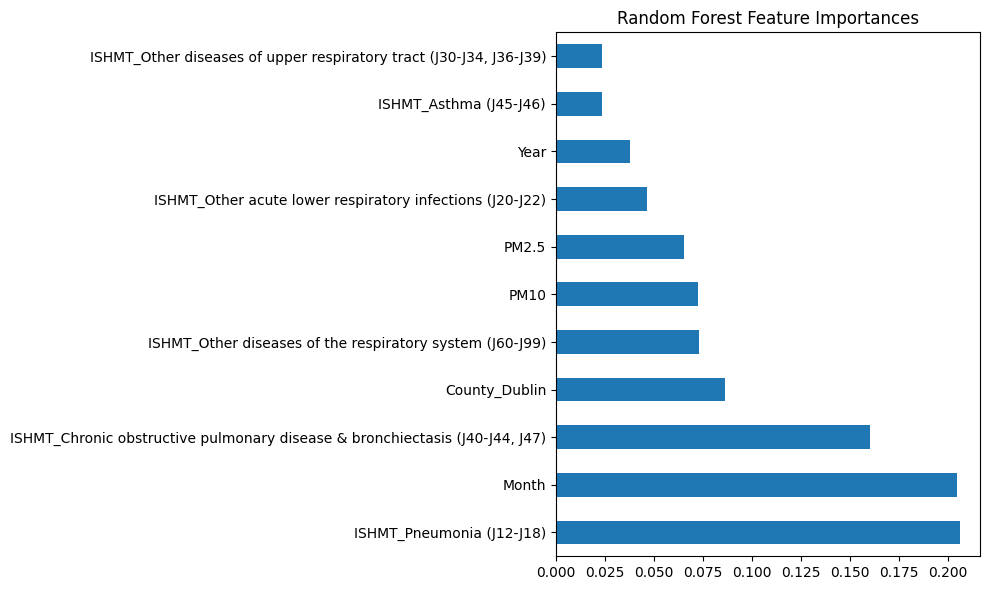

In [9]:
#build random forest model
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest RMSE: {rmse_rf:.2f}")

#plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Random Forest Feature Importances')
plt.tight_layout()
plt.show()


In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples required to split
    'min_samples_leaf': [1, 2, 4],    # Min samples required at leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Feature selection per split
}
rf = RandomForestRegressor(random_state=42)
#grid Search with Cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\lsmyth\AppData\Local\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R² Score: 0.7953633888892149
RMSE: 0.036496511490887555


Feature importances:
ISHMT_Pneumonia (J12-J18)                                                      0.207474
Month                                                                          0.198124
ISHMT_Chronic obstructive pulmonary disease & bronchiectasis (J40-J44, J47)    0.157641
County_Dublin                                                                  0.080100
PM10                                                                           0.076275
ISHMT_Other diseases of the respiratory system (J60-J99)                       0.074624
PM2.5                                                                          0.069466
ISHMT_Other acute lower respiratory infections (J20-J22)                       0.046397
Year                                                                           0.041879
ISHMT_Asthma (J45-J46)                                                         0.024350
ISHMT_Other diseases of upper respiratory tract (J30-J34, J36-J39)             0.023669
dtype: floa

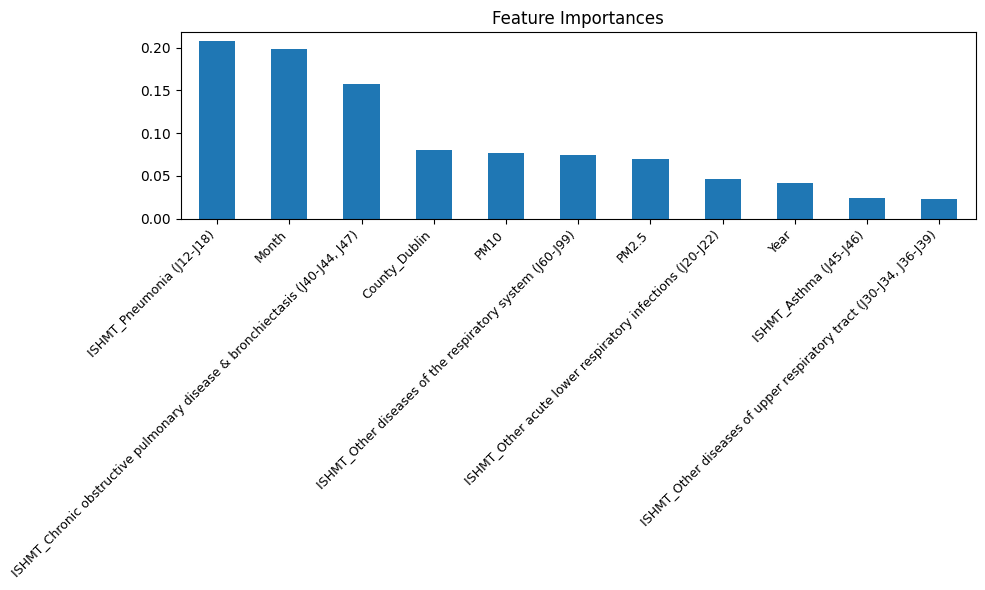

In [11]:
# Get feature importances from the best model
importances = best_rf.feature_importances_

# Assuming your feature names are stored in a list or DataFrame columns, e.g.:
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a pandas Series for easy sorting and plotting
feat_importances = pd.Series(importances, index=feature_names)

# Sort descending
feat_importances = feat_importances.sort_values(ascending=False)

print("Feature importances:")
print(feat_importances)

# Optional: Plot the importances
feat_importances.plot(kind='bar', figsize=(10,6), title='Feature Importances')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

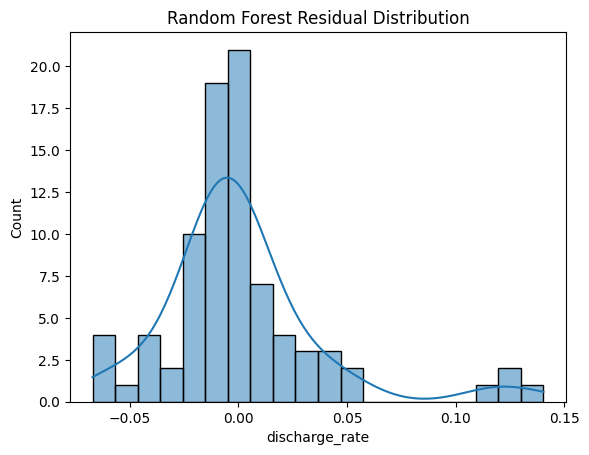

In [14]:
rf_residuals = y_test - best_rf.predict(X_test)
sns.histplot(rf_residuals, kde=True)
plt.title("Random Forest Residual Distribution")
plt.show()


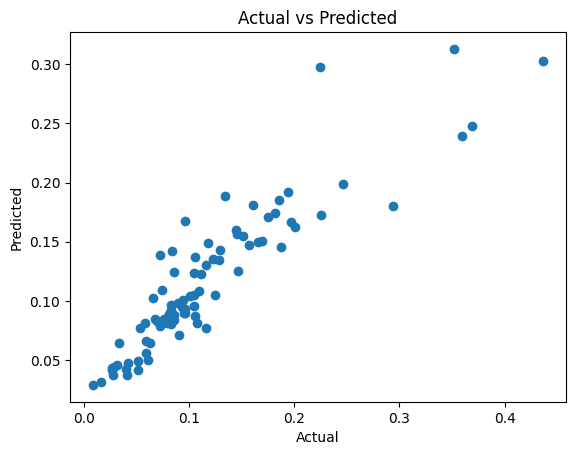

In [15]:
predictions = model.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [16]:
# Show the predictions
print(predictions)

[0.04119405 0.14859388 0.08682232 0.29769266 0.08486212 0.02892929
 0.13912936 0.08407994 0.14223143 0.15677089 0.10395934 0.14510388
 0.09842157 0.08851128 0.06630226 0.09667572 0.09452789 0.15949924
 0.15017506 0.08123126 0.1884586  0.30257484 0.08151859 0.1045472
 0.08036635 0.09591261 0.08425811 0.09204876 0.10085401 0.24741311
 0.0784896  0.16633247 0.07728252 0.08981763 0.1243784  0.03705692
 0.03769728 0.0456855  0.07143917 0.15008228 0.09000393 0.19910886
 0.12552369 0.10897891 0.12284101 0.16750885 0.13491413 0.0414681
 0.07730565 0.08802541 0.16252407 0.08260046 0.04368155 0.17071569
 0.06396532 0.04223609 0.17449767 0.17269667 0.1084054  0.04289958
 0.14281135 0.10506969 0.12390598 0.1550144  0.0476531  0.03144228
 0.18003499 0.04908839 0.05607307 0.08122127 0.31294354 0.08291455
 0.19234076 0.13715306 0.09304809 0.23943144 0.13562609 0.13019818
 0.05012486 0.18489317 0.06407678 0.1472779  0.10242038 0.18068937]


#### Build for mydata_post_feb2022 (up to the end of the COVID restrictions)


Random Forest RMSE: 0.04


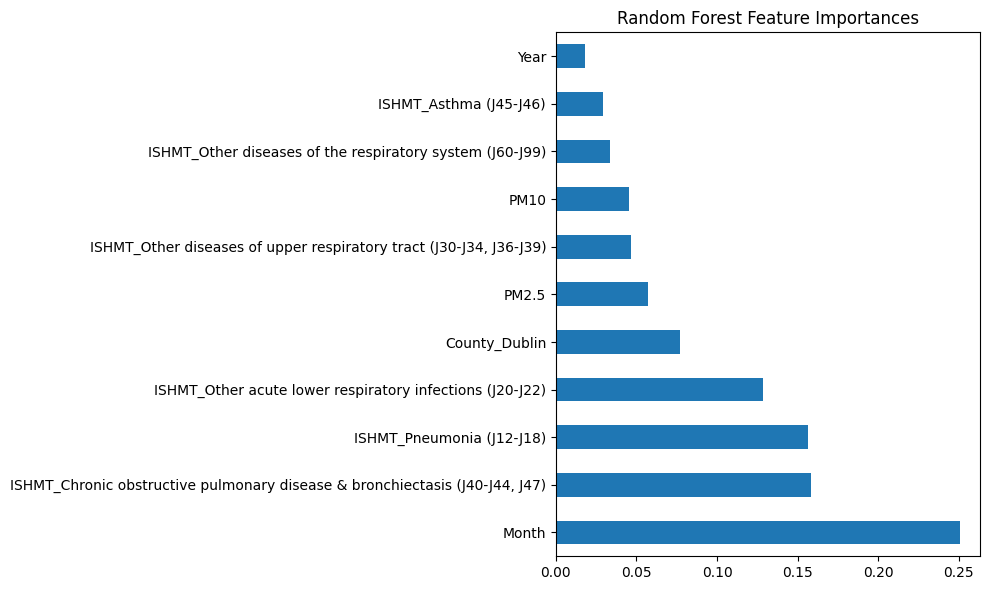

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\lsmyth\AppData\Local\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
R² Score: 0.6799284072089367
RMSE: 0.03537000869482667
Feature importances:
Month                                                                          0.257620
ISHMT_Chronic obstructive pulmonary disease & bronchiectasis (J40-J44, J47)    0.165517
ISHMT_Pneumonia (J12-J18)                                                      0.163365
ISHMT_Other acute lower respiratory infections (J20-J22)                       0.139767
County_Dublin                                                                  0.080907
PM2.5                                                                          0.053793
ISHMT_Other diseases of upper respiratory tract (J30-J34, J36-J39)             0.035694
PM10                                                                           0.033031
ISHMT_Other diseases of the respiratory system (J60-J99)                       0.03198

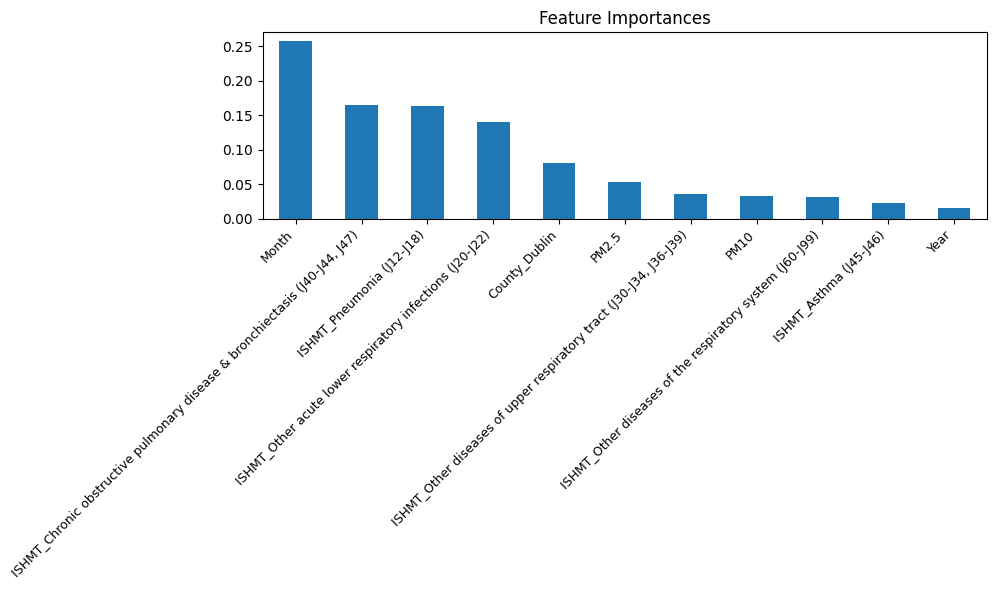

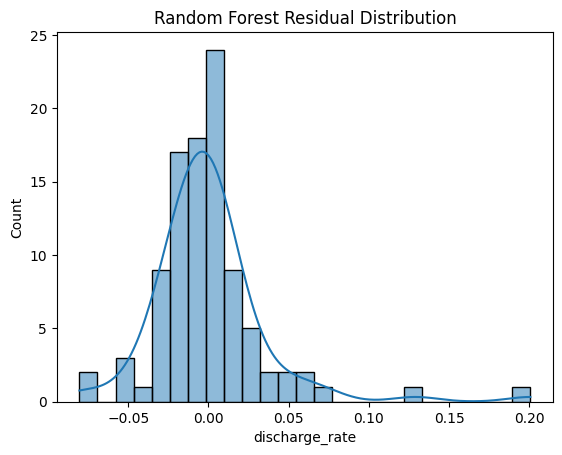

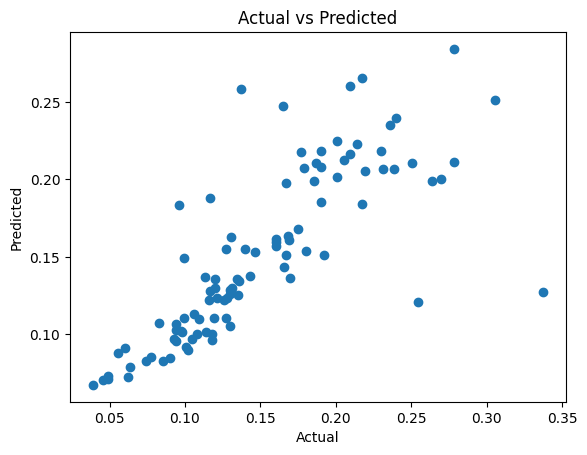

[0.16772588 0.21812941 0.15960281 0.10270905 0.20725576 0.20549382
 0.13551576 0.21763609 0.12824703 0.26513473 0.15500399 0.1103605
 0.15723375 0.1024183  0.1376289  0.16119901 0.2510375  0.10987162
 0.08271032 0.07098267 0.15330108 0.10663641 0.08792697 0.21056662
 0.26023672 0.21105792 0.18817934 0.10026832 0.24735098 0.13693445
 0.20780866 0.13005605 0.08562688 0.13025121 0.0968765  0.2105251
 0.18398701 0.12720531 0.11296868 0.12196558 0.2161718  0.09099158
 0.20642948 0.21833303 0.13645519 0.22488023 0.1106961  0.19870552
 0.08315312 0.08505676 0.19773438 0.07267934 0.12235759 0.09661042
 0.20054801 0.14900106 0.23990645 0.07303922 0.12341343 0.22310378
 0.16313743 0.10155573 0.10742597 0.15109099 0.19892866 0.15491596
 0.07083668 0.10153298 0.14372093 0.18517155 0.09188672 0.20141178
 0.23515814 0.13574872 0.15391367 0.2122956  0.25807775 0.20660635
 0.09583887 0.09016442 0.16372336 0.12554028 0.28413055 0.13470347
 0.12896232 0.12322957 0.10061221 0.1258451  0.06748634 0.161496

In [22]:
mydata_model = mydata_post_feb2022
#get rid of date it is not needed
mydata_model = mydata_model.drop(columns=['date'])

#sort X (features) and y (target)
X = mydata_model.drop(columns=['discharge_rate'])
y = mydata_model['discharge_rate']

#split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#build random forest model
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest RMSE: {rmse_rf:.2f}")

#plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Random Forest Feature Importances')
plt.tight_layout()
plt.show()

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples required to split
    'min_samples_leaf': [1, 2, 4],    # Min samples required at leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Feature selection per split
}
rf = RandomForestRegressor(random_state=42)
#grid Search with Cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Get feature importances from the best model
importances = best_rf.feature_importances_

# Assuming your feature names are stored in a list or DataFrame columns, e.g.:
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a pandas Series for easy sorting and plotting
feat_importances = pd.Series(importances, index=feature_names)

# Sort descending
feat_importances = feat_importances.sort_values(ascending=False)

print("Feature importances:")
print(feat_importances)

# Optional: Plot the importances
feat_importances.plot(kind='bar', figsize=(10,6), title='Feature Importances')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

rf_residuals = y_test - best_rf.predict(X_test)
sns.histplot(rf_residuals, kde=True)
plt.title("Random Forest Residual Distribution")
plt.show()

predictions = model.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# Show the predictions
print(predictions)

#### Don't split data


Random Forest RMSE: 0.04


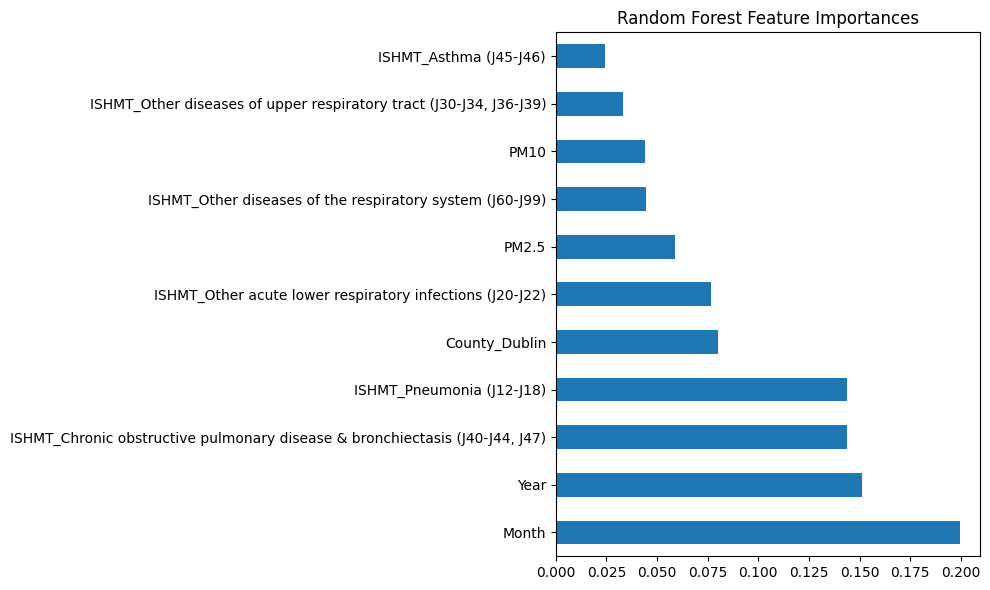

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R² Score: 0.6905334359779804
RMSE: 0.042784411410144316
Feature importances:
Month                                                                          0.199973
Year                                                                           0.149619
ISHMT_Pneumonia (J12-J18)                                                      0.145132
ISHMT_Chronic obstructive pulmonary disease & bronchiectasis (J40-J44, J47)    0.143709
County_Dublin                                                                  0.077965
ISHMT_Other acute lower respiratory infections (J20-J22)                       0.077263
PM2.5                                                                          0.060540
PM10                                                                           0.044756
ISHMT_Other diseases of

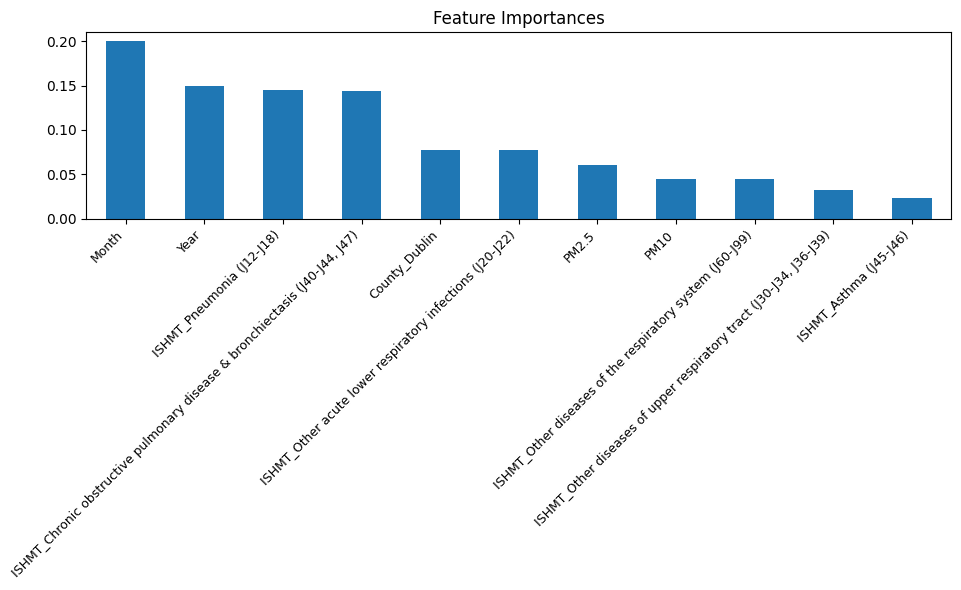

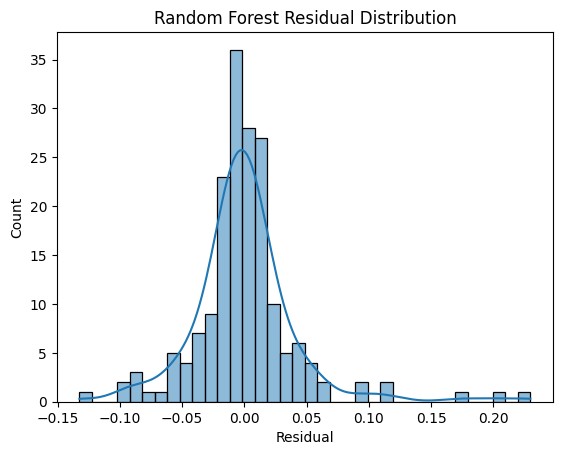

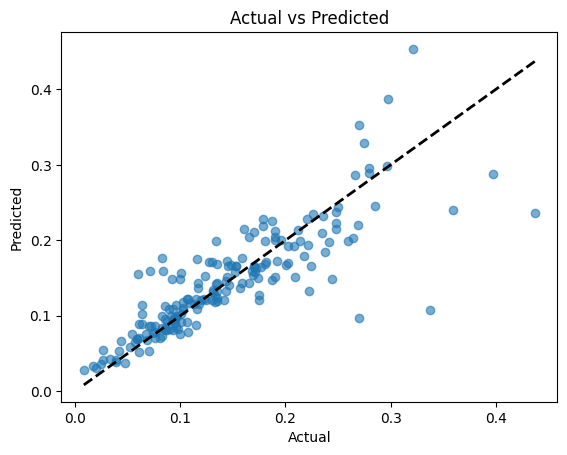

[0.07115799 0.14269493 0.23642762 0.15669831 0.15915205 0.10840682
 0.03351895 0.10225239 0.14894791 0.13183013 0.03914908 0.10893136
 0.07561385 0.4534771  0.15174621 0.16478284 0.09764299 0.1985981
 0.14757143 0.06587199 0.04176916 0.28886833 0.16720975 0.22851361
 0.14585703 0.12156035 0.1076939  0.09416262 0.21302417 0.05523975
 0.20450912 0.11078499 0.15519154 0.23209866 0.15088716 0.17892283
 0.09625449 0.09190324 0.07889117 0.23527411 0.13464605 0.09441278
 0.16322271 0.21433586 0.05394471 0.1723212  0.15435897 0.08623419
 0.07603306 0.19776663 0.20910481 0.22072165 0.08666565 0.17031629
 0.23744682 0.15773165 0.19918111 0.11443247 0.07582618 0.16795646
 0.15239119 0.16664704 0.19949105 0.17221146 0.14015852 0.08935467
 0.240746   0.38750127 0.11393451 0.16593753 0.11324859 0.04109179
 0.14391407 0.13727308 0.17142011 0.15172446 0.07048562 0.20343952
 0.22270112 0.08890594 0.19297535 0.13628488 0.28711902 0.1440816
 0.10797104 0.10234831 0.08186943 0.19236044 0.14983747 0.200084

In [27]:
mydata_model = mydata_2022_encoded
#get rid of date it is not needed
mydata_model = mydata_model.drop(columns=['date'])

#sort X (features) and y (target)
X = mydata_model.drop(columns=['discharge_rate'])
y = mydata_model['discharge_rate']

#split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#build random forest model
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest RMSE: {rmse_rf:.2f}")

#plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Random Forest Feature Importances')
plt.tight_layout()
plt.show()

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples required to split
    'min_samples_leaf': [1, 2, 4],    # Min samples required at leaf node
    'max_features': ['sqrt', 'log2', None] # Feature selection per split
}
rf = RandomForestRegressor(random_state=42)
#grid Search with Cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Get feature importances from the best model
importances = best_rf.feature_importances_

# Assuming your feature names are stored in a list or DataFrame columns, e.g.:
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a pandas Series for easy sorting and plotting
feat_importances = pd.Series(importances, index=feature_names)

# Sort descending
feat_importances = feat_importances.sort_values(ascending=False)

print("Feature importances:")
print(feat_importances)

# Optional: Plot the importances
feat_importances.plot(kind='bar', figsize=(10,6), title='Feature Importances')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

rf_residuals = y_test - best_rf.predict(X_test)
sns.histplot(rf_residuals, kde=True)
plt.xlabel("Residual")
plt.title("Random Forest Residual Distribution")
plt.show()

predictions = best_rf.predict(X_test)

plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# Show the predictions
print(predictions)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Random Forest CV R²:", rf_scores)
print(f"Average RF R²: {rf_scores.mean():.3f}")